In [222]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df.Gender = le.fit_transform(df[['Gender']])

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

In [115]:
##for Regression
x_regression=df.drop(["Weight"],axis=1)
y_regression=df.Weight

In [123]:
##for classification
x_classification=df.drop(["Gender"],axis=1)
y_classification=df.Gender

In [127]:
y_classification.value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

# EDA

In [13]:
# for regression analysos the train test split are
from sklearn.model_selection import train_test_split

For regrassion train test spiit are

In [28]:
xreg_train,xreg_test,yreg_train,yreg_test=train_test_split(x_regression,y_regression,test_size=0.30,random_state=42)

for classificxation the train test split are

In [146]:
xcls_train,xcls_test,ycls_train,ycls_test=train_test_split(x_classification,y_classification,test_size=0.30,random_state=42)

# Least Squared Linear Regression

In [258]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [54]:
linear_reg=LinearRegression()
linear_reg.fit(xreg_train,yreg_train)

LinearRegression()

In [58]:
linear_reg_predt=linear_reg.predict(xreg_test)

In [66]:
linear_reg.score(xreg_train,yreg_train) #traning accurecy

0.8973793060969246

In [72]:
linear_reg.score(xreg_test,yreg_test)  #test accurecy

0.9059112424422658

In [74]:
R2_score=r2_score(yreg_test,linear_reg_predt)  #r2_score
R2_score

0.9059112424422658

In [76]:
MSE=mean_squared_error(yreg_test,linear_reg_predt) #MSE
MSE

96.83734437830613

In [78]:
print(f"The R2_score is = {R2_score}")
print(f"The MSE value is = {MSE}")

The R2_score is = 0.9059112424422658
The MSE value is = 96.83734437830613


#### The linear Regression R2_score is = 0.9059112424422658 <br/>
#### The Linear Regression MSE value is = 96.83734437830613

# Regression Problem

## KNN Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
knn_reg=KNeighborsRegressor(n_neighbors=93)
knn_reg.fit(xreg_train,yreg_train)

KNeighborsRegressor(n_neighbors=93)

In [94]:
knn_reg_predt=knn_reg.predict(xreg_test)

In [96]:
knn_reg.score(xreg_train,yreg_train)

0.8959639709881267

In [98]:
knn_reg.score(xreg_test,yreg_test)

0.9038180629081859

In [102]:
knn_r2_score=r2_score(yreg_test,knn_reg_predt)
knn_r2_score

0.9038180629081859

In [106]:
knn_MSE=mean_squared_error(yreg_test,knn_reg_predt)
knn_MSE

98.99167134200263

In [108]:
print(f"The KNN regression  R2_score is = {knn_r2_score}")
print(f"The KNN Regression MSE value is = {knn_MSE}")

The KNN regression  R2_score is = 0.9038180629081859
The KNN Regression MSE value is = 98.99167134200263


#### The KNN regression  R2_score is = 0.9038180629081859 <br>
#### The KNN Regression MSE value is = 98.99167134200263

# Classification Problem

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## For Logicstic Regrassion Classification The pipeline

In [144]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

logisric_pipeline = Pipeline([('smote_tomek', SMOTETomek(random_state=42)),    # Handles imbalance
    ('logistic', LogisticRegression())   
])
logisric_pipeline.fit(xcls_train,ycls_train)

Pipeline(steps=[('smote_tomek', SMOTETomek(random_state=42)),
                ('logistic', LogisticRegression())])

In [192]:
logicstic_predt=logisric_pipeline.predict(xcls_test)

In [198]:
logisric_pipeline.score(xcls_train,ycls_train)

0.9180026720106881

In [200]:
logisric_pipeline.score(xcls_test,ycls_test)

0.9205298013245033

In [280]:
log_accurecy=accuracy_score(ycls_test,logicstic_predt)
log_accurecy

0.9205298013245033

In [282]:
log_mse=mean_squared_error(ycls_test,logicstic_predt)
log_mse

0.07947019867549669

In [284]:
print(f"The Logicstic regrassion  Accurecy_score is = {log_accurecy}")
print(f"The Logicstic regrassion MSE value is = {log_mse}")

The Logicstic regrassion  Accurecy_score is = 0.9205298013245033
The Logicstic regrassion MSE value is = 0.07947019867549669


#### The Logicstic regrassion  Accurecy_score is = 0.92052 <br/>
#### The Logicstic regrassion MSE value is = 0.07947

## For KNN Classification The pipeline

In [246]:
knn_pipeline = Pipeline([('smote_tomek', SMOTETomek(random_state=42)),    # Handles imbalance
    ('knn', KNeighborsClassifier(n_neighbors=93))     # Classifier
])
knn_pipeline.fit(xcls_train,ycls_train)

Pipeline(steps=[('smote_tomek', SMOTETomek(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=93))])

In [248]:
Knn_predt1=knn_pipeline.predict(xcls_test)

In [250]:
knn_pipeline.score(xcls_test,ycls_test)

0.9189715621347877

In [251]:
knn_pipeline.score(xcls_train,ycls_train)

0.9134936539746159

In [270]:
knn_accurecy=accuracy_score(ycls_test,Knn_predt1)
knn_accurecy

0.9189715621347877

In [274]:
knn_cls_mse=mean_squared_error(ycls_test,Knn_predt1)
knn_cls_mse

0.08102843786521231

In [276]:
print(f"The KNN classification  Accurecy_score is = {knn_accurecy}")
print(f"The KNN Classification MSE value is = {knn_cls_mse}")

The KNN classification  Accurecy_score is = 0.9189715621347877
The KNN Classification MSE value is = 0.08102843786521231


#### The KNN classification  Accurecy_score is = 0.91898 <br/>
#### The KNN Classification MSE value is = 0.08102

# Comparison of Linear Rgeression and KNN Regressor

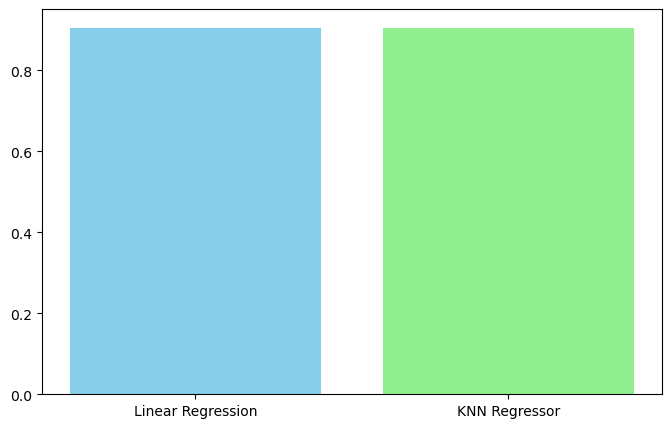

In [218]:
#plot
import matplotlib.pyplot as plt
models = ['Linear Regression', 'KNN Regressor']
scores = [0.90591, 0.90381]
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=['skyblue', 'lightgreen'])

# Comparison of Logistic Rgeression and KNN Classifier

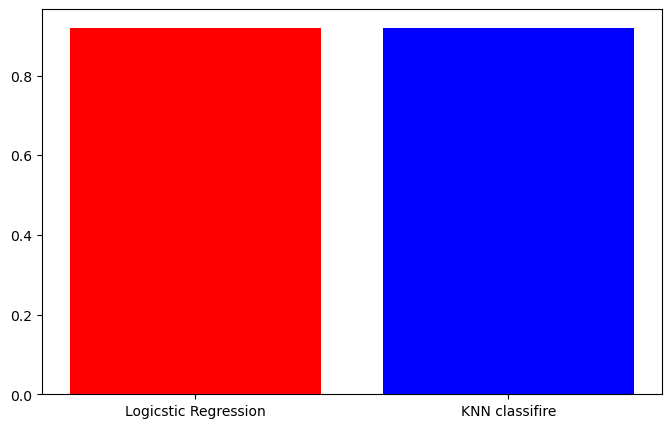

In [268]:
#plot
import matplotlib.pyplot as plt
models = ['Logicstic Regression', 'KNN classifire']
scores = [0.9205, 0.9189]
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=['r', 'b'])